In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2001(2) 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_012(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata012 = pd.read_csv("perlist012_h.csv")
    f = perdata012['f']
    per = perdata012['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata012)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m012=Minuit(twi_minus_loglikelihood_012,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)
'''
对log_A的限制出现问题
'''

m012.migrad()

pprint(m012.fval)

FCN = 3036.1831167929986 
 TOTAL NCALL = 626 
 NCALLS = 626 
 
 
 EDM = 6.530248474442207e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,0.475462,2.36639,,,-3,3,No
1,log_f_b,-6.58317,3.83366,,,-7,-2,No
2,alpha_H,2.6548,0.628058,,,1,5,No
3,log_poisson,0.380979,0.0156685,,,-3,3,No


3036.1831167929986


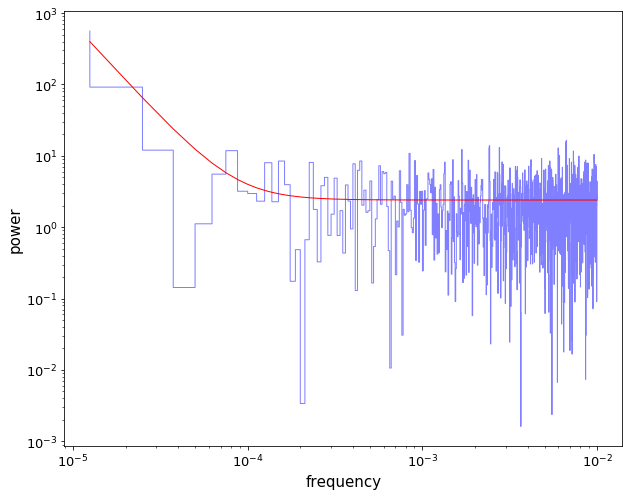

In [4]:
perdata012 = pd.read_csv("perlist012_h.csv")
f_012 = perdata012['f']
per_012 = perdata012['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m012.values[0],m012.values[1],m012.values[2],m012.values[3]

model_012 = []
f_length_012 = len(f_012)
for i in range(f_length_012):
    model_012.append(((f_012[i]**(-alpha_L))/(1+(f_012[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_012, per_012, color="b", alpha=0.5, linewidth=1)
plt.plot(f_012, model_012, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2001(2) 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_012(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata012 = pd.read_csv("perlist012_h.csv")
    f = perdata012['f']
    per = perdata012['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata012)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n012=Minuit(twi_minus_loglikelihood_nobreak_012,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-12,-8),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n012.migrad()

print(n012.fval)

FCN = 3036.1818734829417 
 TOTAL NCALL = 130 
 NCALLS = 130 
 
 
 EDM = 1.5547247784331463e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-10.43,1.57882,,,-12,-8,No
1,alpha,2.65692,0.400002,,,1,5,No
2,log_poisson,0.380963,0.0155861,,,-3,3,No


3036.1818734829417


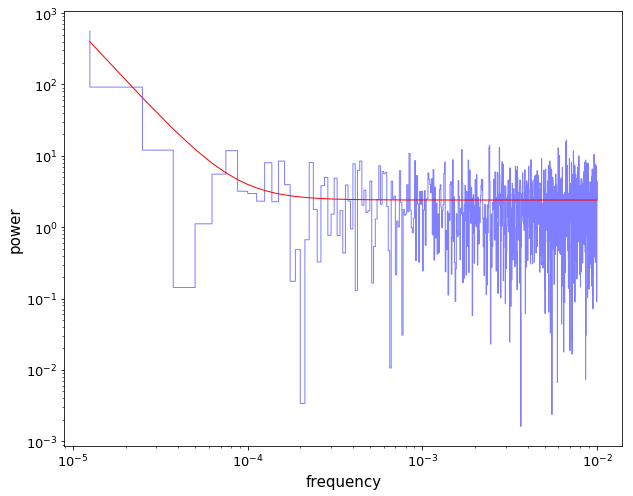

In [7]:
log_A,alpha,log_poisson = n012.values[0],n012.values[1],n012.values[2]

model_nob_012 = []
f_length_012 = len(f_012)
for i in range(f_length_012):
    model_nob_012.append((f_012[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_012, per_012, color="b", alpha=0.5, linewidth=1)
plt.plot(f_012, model_nob_012, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.001243310056906921


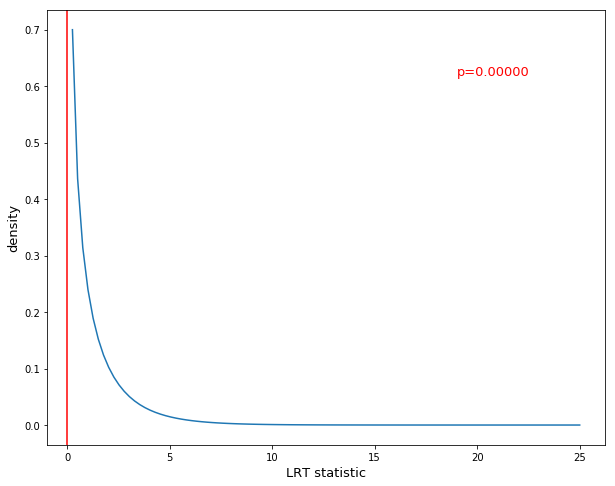

In [8]:
import scipy.stats as stats

# LRT statistic
T = n012.fval-m012.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2006(3) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_063(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata063 = pd.read_csv("perlist063_h.csv")
    f = perdata063['f']
    per = perdata063['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata063)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m063=Minuit(twi_minus_loglikelihood_063,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,5),limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)
'''
对log_A的限制出现问题
'''

m063.migrad()

pprint(m063.fval)

FCN = 995.7690131205461 
 TOTAL NCALL = 338 
 NCALLS = 338 
 
 
 EDM = 0.00012368354440923755 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,0.380948,1.24173,,,-5,5,No
1,log_f_b,-6.53648,1.00139,,,-7,-2,No
2,alpha_H,2.12921,0.187458,,,1,5,No
3,log_poisson,-0.0729538,0.0218959,,,-3,3,No


995.7690131205461


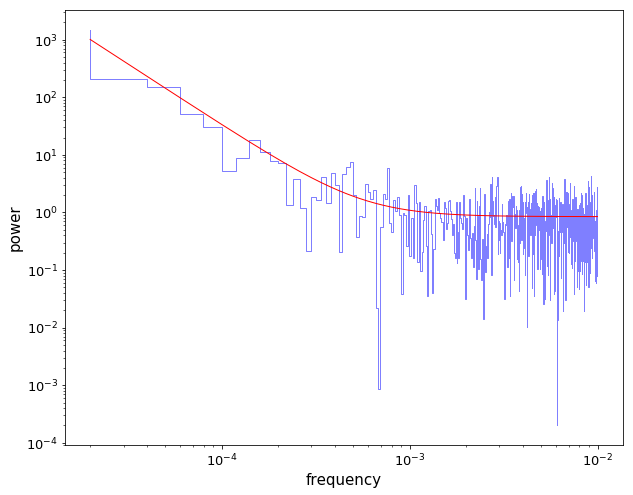

In [11]:
perdata063 = pd.read_csv("perlist063_h.csv")
f_063 = perdata063['f']
per_063 = perdata063['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m063.values[0],m063.values[1],m063.values[2],m063.values[3]

model_063 = []
f_length_063 = len(f_063)
for i in range(f_length_063):
    model_063.append(((f_063[i]**(-alpha_L))/(1+(f_063[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_063, per_063, color="b", alpha=0.5, linewidth=1)
plt.plot(f_063, model_063, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2006(3) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_063(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata063 = pd.read_csv("perlist063_h.csv")
    f = perdata063['f']
    per = perdata063['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata063)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n063=Minuit(twi_minus_loglikelihood_nobreak_063,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-10,-5),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n063.migrad()

pprint(n063.fval)

FCN = 995.7628435495868 
 TOTAL NCALL = 69 
 NCALLS = 69 
 
 
 EDM = 6.684064207076592e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-6.99612,0.727121,,,-10,-5,No
1,alpha,2.12768,0.19799,,,1,5,No
2,log_poisson,-0.0728425,0.0220218,,,-3,3,No


995.7628435495868


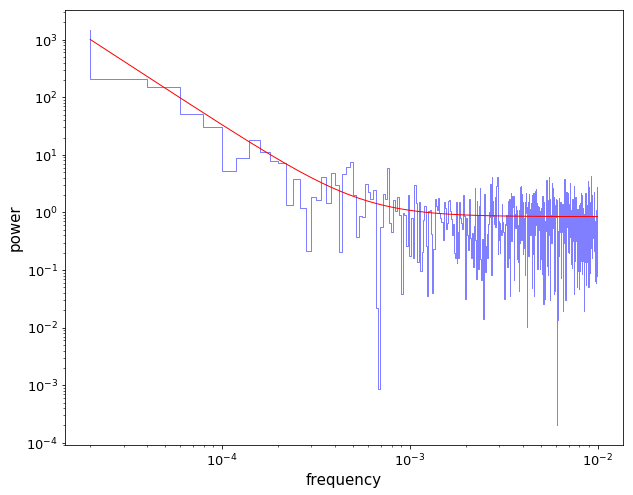

In [14]:
log_A,alpha,log_poisson = n063.values[0],n063.values[1],n063.values[2]

model_nob_063 = []
f_length_063 = len(f_063)
for i in range(f_length_063):
    model_nob_063.append((f_063[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_063, per_063, color="b", alpha=0.5, linewidth=1)
plt.plot(f_063, model_nob_063, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.00616957095928683


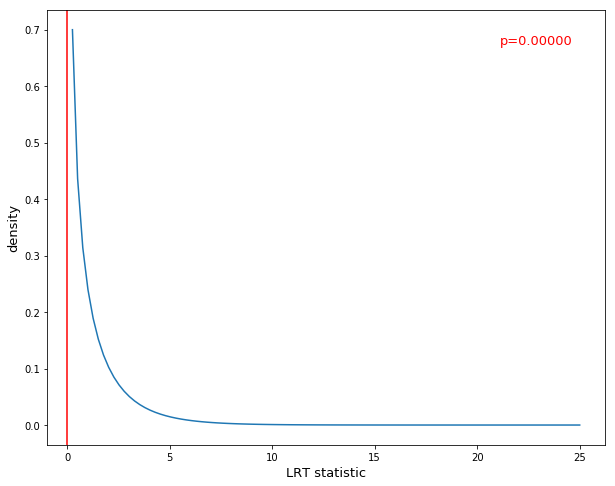

In [15]:
import scipy.stats as stats

# LRT statistic
T = n063.fval-m063.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [16]:
data012 = pd.read_csv("energy_ngc3516_012.csv")  
x012 = data012['x']
y012 = data012['y']
xerr012 = data012['xerr']
yerr012 = data012['yerr']

data063 = pd.read_csv("energy_ngc3516_063.csv")  
x063 = data063['x']
y063 = data063['y']
xerr063 = data063['xerr']
yerr063 = data063['yerr']

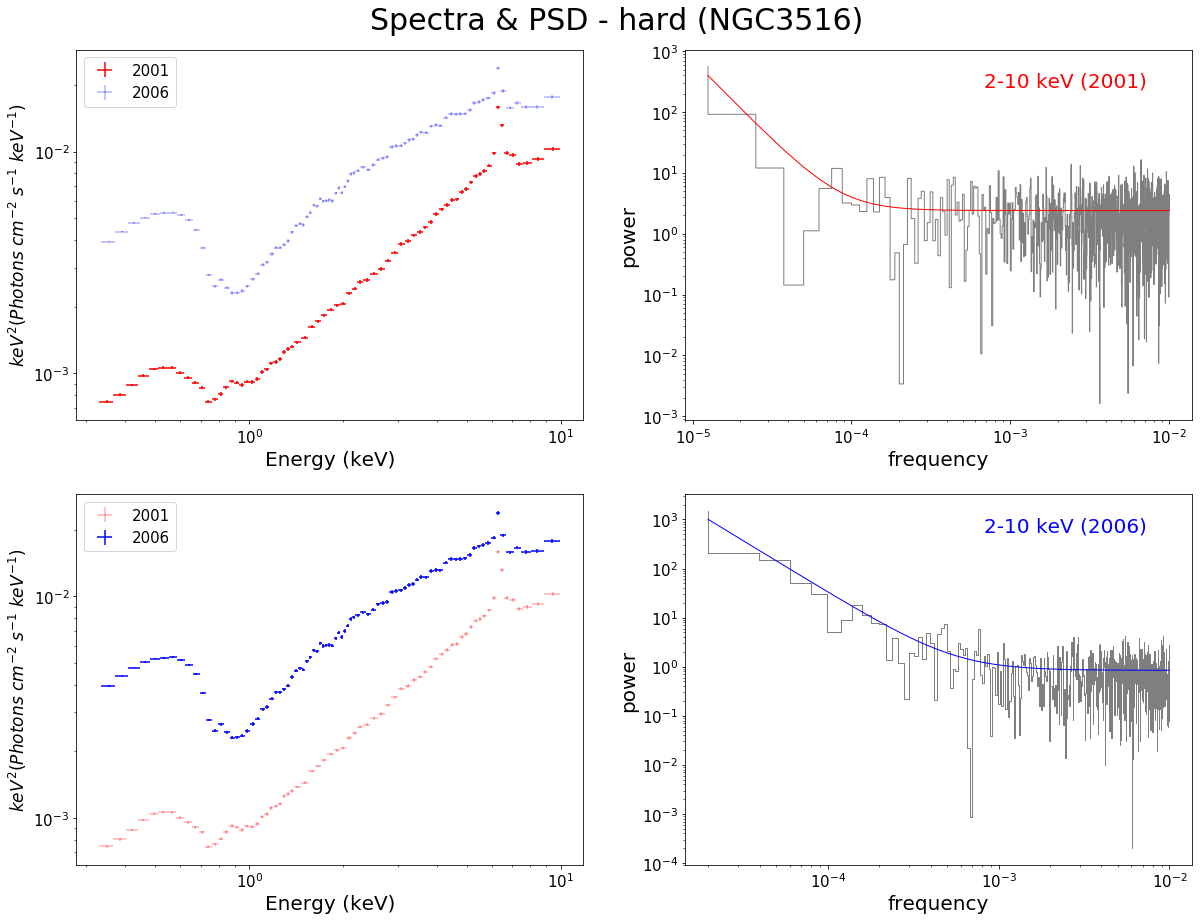

In [17]:
fig= plt.figure(figsize=(20,15))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.loglog()
ax1.errorbar(x012, y012, yerr=yerr012, xerr=xerr012, fmt=',r', label='2001')
ax1.errorbar(x063, y063, yerr=yerr063, xerr=xerr063, fmt=',b', alpha=0.3, label='2006')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x012, y012, yerr=yerr012, xerr=xerr012, fmt=',r', alpha=0.3, label='2001')
ax3.errorbar(x063, y063, yerr=yerr063, xerr=xerr063, fmt=',b', label='2006')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_012, per_012, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_012, model_012, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2001)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_063, per_063, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_063, model_063, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2006)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - hard (NGC3516)", x=0.5, y=0.92, fontsize=30)
plt.show()